In [3]:
# Importing libraries
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('Api-Key.csv')
rapid_api_key = df.loc[df['API']== 'RapidApi']['KEY'].iloc[0]

In [13]:
import requests

url = "https://aerodatabox.p.rapidapi.com/flights/airports/iata/YYZ"

querystring = {"offsetMinutes":"-120","durationMinutes":"720","withLeg":"true","direction":"Both","withCancelled":"true","withCodeshared":"true","withCargo":"true","withPrivate":"true","withLocation":"false"}

headers = {
	"x-rapidapi-key": rapid_api_key,
	"x-rapidapi-host": "aerodatabox.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)
new_response = response.json()
print(response.status_code, '\n')
print(new_response)

200 

{'departures': [{'departure': {'scheduledTime': {'utc': '2025-07-11 20:00Z', 'local': '2025-07-11 16:00-04:00'}, 'revisedTime': {'utc': '2025-07-11 20:03Z', 'local': '2025-07-11 16:03-04:00'}, 'terminal': '3', 'gate': 'A12', 'quality': ['Basic', 'Live']}, 'arrival': {'airport': {'icao': 'KBNA', 'iata': 'BNA', 'name': 'Nashville', 'timeZone': 'America/Chicago'}, 'scheduledTime': {'utc': '2025-07-11 22:15Z', 'local': '2025-07-11 17:15-05:00'}, 'revisedTime': {'utc': '2025-07-11 21:53Z', 'local': '2025-07-11 16:53-05:00'}, 'quality': ['Basic', 'Live']}, 'number': 'WS 1428', 'callSign': 'WJA1428', 'status': 'Departed', 'codeshareStatus': 'IsOperator', 'isCargo': False, 'aircraft': {'reg': 'C-GPFT', 'modeS': 'C06CDA', 'model': 'Boeing 737 MAX 8'}, 'airline': {'name': 'WestJet', 'iata': 'WS', 'icao': 'WJA'}}, {'departure': {'scheduledTime': {'utc': '2025-07-11 20:00Z', 'local': '2025-07-11 16:00-04:00'}, 'revisedTime': {'utc': '2025-07-11 20:03Z', 'local': '2025-07-11 16:03-04:00'}, 't

In [41]:
departures = new_response.get('departures', [])
df = pd.json_normalize(departures)
    
# Cleaning up column names (making it more readable)
df.columns = df.columns.str.replace('.', '_')
df

,number,callSign,status,codeshareStatus,isCargo,departure_scheduledTime_utc,departure_scheduledTime_local,departure_revisedTime_utc,departure_revisedTime_local,departure_terminal,...,aircraft_model,airline_name,airline_iata,airline_icao,arrival_runwayTime_utc,arrival_runwayTime_local,arrival_terminal,departure_runwayTime_utc,departure_runwayTime_local,arrival_baggageBelt
0,TS 7181,POE451,Departed,IsCodeshared,False,2025-07-10 14:45Z,2025-07-10 10:45-04:00,2025-07-10 14:51Z,2025-07-10 10:51-04:00,3,...,Embraer 195,Air Transat,TS,TSC,NaN,NaN,NaN,NaN,NaN,NaN
1,PD 451,POE451,Departed,IsOperator,False,2025-07-10 14:45Z,2025-07-10 10:45-04:00,2025-07-10 14:51Z,2025-07-10 10:51-04:00,3,...,Embraer 195,Porter,PD,POE,NaN,NaN,NaN,NaN,NaN,NaN
2,NZ 9808,RPA3499,Departed,IsCodeshared,False,2025-07-10 15:00Z,2025-07-10 11:00-04:00,2025-07-10 14:56Z,2025-07-10 10:56-04:00,1,...,Embraer 175,Air New Zealand,NZ,ANZ,2025-07-10 16:25Z,2025-07-10 11:25-05:00,2,NaN,NaN,NaN
3,UA 3499,UAL3499,Departed,IsOperator,False,2025-07-10 15:00Z,2025-07-10 11:00-04:00,2025-07-10 14:56Z,2025-07-10 10:56-04:00,1,...,Embraer 175,United,UA,UAL,2025-07-10 16:25Z,2025-07-10 11:25-05:00,2,NaN,NaN,NaN
4,AC 4408,RPA3499,Departed,IsCodeshared,False,2025-07-10 15:00Z,2025-07-10 11:00-04:00,2025-07-10 14:56Z,2025-07-10 10:56-04:00,1,...,Embraer 175,Air Canada,AC,ACA,2025-07-10 16:25Z,2025-07-10 11:25-05:00,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,SN 9585,NaN,Expected,IsCodeshared,False,2025-07-11 02:45Z,2025-07-10 22:45-04:00,2025-07-11 02:45Z,2025-07-10 22:45-04:00,1,...,Boeing 787-8,Brussels,SN,BEL,NaN,NaN,2C,NaN,NaN,NaN
1114,OS 8195,NaN,Expected,IsCodeshared,False,2025-07-11 02:45Z,2025-07-10 22:45-04:00,2025-07-11 02:45Z,2025-07-10 22:45-04:00,1,...,Boeing 787-8,Austrian,OS,AUA,NaN,NaN,2C,NaN,NaN,NaN
1115,AC 930,NaN,Expected,IsOperator,False,2025-07-11 02:45Z,2025-07-10 22:45-04:00,2025-07-11 02:45Z,2025-07-10 22:45-04:00,1,...,Boeing 787-8,Air Canada,AC,ACA,NaN,NaN,2C,NaN,NaN,NaN
1116,UA 8278,NaN,Expected,IsCodeshared,False,2025-07-11 02:45Z,2025-07-10 22:45-04:00,2025-07-11 02:45Z,2025-07-10 22:45-04:00,1,...,Boeing 787-8,United,UA,UAL,NaN,NaN,2C,NaN,NaN,NaN


In [49]:
print('--Data Info--','\n')
df.info()    

--Data Info-- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   number                         1118 non-null   object
 1   callSign                       79 non-null     object
 2   status                         1118 non-null   object
 3   codeshareStatus                1118 non-null   object
 4   isCargo                        1118 non-null   bool  
 5   departure_scheduledTime_utc    1118 non-null   object
 6   departure_scheduledTime_local  1118 non-null   object
 7   departure_revisedTime_utc      1115 non-null   object
 8   departure_revisedTime_local    1115 non-null   object
 9   departure_terminal             1118 non-null   object
 10  departure_gate                 1115 non-null   object
 11  departure_quality              1118 non-null   object
 12  arrival_airport_icao           1118 non-null  

In [53]:
print('--Data Shape--','\n')
print(f" {df.shape[0]} rows, {df.shape[1]} columns")

--Data Shape-- 

 1118 rows, 35 columns


In [55]:
for i, col in enumerate(df.columns):
    print(f"{i+1}. {col}")

1. number
2. callSign
3. status
4. codeshareStatus
5. isCargo
6. departure_scheduledTime_utc
7. departure_scheduledTime_local
8. departure_revisedTime_utc
9. departure_revisedTime_local
10. departure_terminal
11. departure_gate
12. departure_quality
13. arrival_airport_icao
14. arrival_airport_iata
15. arrival_airport_name
16. arrival_airport_timeZone
17. arrival_scheduledTime_utc
18. arrival_scheduledTime_local
19. arrival_revisedTime_utc
20. arrival_revisedTime_local
21. arrival_gate
22. arrival_quality
23. arrival_flight_number
24. aircraft_reg
25. aircraft_modeS
26. aircraft_model
27. airline_name
28. airline_iata
29. airline_icao
30. arrival_runwayTime_utc
31. arrival_runwayTime_local
32. arrival_terminal
33. departure_runwayTime_utc
34. departure_runwayTime_local
35. arrival_baggageBelt


In [57]:
df_copy = df.copy()

In [73]:
missing_info = df_copy.isnull().sum()
missing_info

number                              0
callSign                         1039
status                              0
codeshareStatus                     0
isCargo                             0
departure_scheduledTime_utc         0
departure_scheduledTime_local       0
departure_revisedTime_utc           3
departure_revisedTime_local         3
departure_terminal                  0
departure_gate                      3
departure_quality                   0
arrival_airport_icao                0
arrival_airport_iata                0
arrival_airport_name                0
arrival_airport_timeZone            0
arrival_scheduledTime_utc          11
arrival_scheduledTime_local        11
arrival_revisedTime_utc           535
arrival_revisedTime_local         535
arrival_gate                      802
arrival_quality                     0
arrival_flight_number               0
aircraft_reg                     1050
aircraft_modeS                   1039
aircraft_model                     51
airline_name

In [159]:
missing_df = pd.DataFrame({
        'Column': missing_info.index,
        'Missing_Count': missing_info.values,
    }).sort_values('Missing_Count', ascending=False)
    
print("Missing values by column:")
print(missing_df[missing_df['Missing_Count'] > 0])

Missing values by column:
                         Column  Missing_Count
33   departure_runwayTime_local           1114
32     departure_runwayTime_utc           1114
30     arrival_runwayTime_local           1096
29       arrival_runwayTime_utc           1096
23                 aircraft_reg           1050
24               aircraft_modeS           1039
1                      callSign           1039
34          arrival_baggageBelt            918
20                 arrival_gate            802
19    arrival_revisedTime_local            535
18      arrival_revisedTime_utc            535
31             arrival_terminal            490
25               aircraft_model             51
16    arrival_scheduledTime_utc             11
17  arrival_scheduledTime_local             11
27                 airline_iata              4
7     departure_revisedTime_utc              3
10               departure_gate              3
8   departure_revisedTime_local              3
28                 airline_icao   

In [97]:
# Dropping columns with higher percentage of missing values

threshold = 0.9 # here 0.9 indicates 90%, meaning those columns that have 90% of their data missing
missing_percent = df.isnull().sum() / len(df)
columns = missing_percent[missing_percent > threshold].index.tolist()

print(f"Dropping {len(columns)} columns with >{threshold*100}% missing values:")
for col in columns:
    print(f"  {col}: {missing_pct[col]:.1%} missing")

# creating another dataset which will be further used for exploratory analysis
df_clean = df.drop(columns = columns)

#Remaining columns
print(f"\nRemaining columns: {df_clean.shape[1]}")
print(f"Remaining rows: {df_clean.shape[0]}")

remaining_missing = df_clean.isnull().sum()
print("\nMissing values in remaining columns:")
print(remaining_missing[remaining_missing > 0].sort_values(ascending=False))

Dropping 7 columns with >90.0% missing values:
  callSign: 92.9% missing
  aircraft_reg: 93.9% missing
  aircraft_modeS: 92.9% missing
  arrival_runwayTime_utc: 98.0% missing
  arrival_runwayTime_local: 98.0% missing
  departure_runwayTime_utc: 99.6% missing
  departure_runwayTime_local: 99.6% missing

Remaining columns: 28
Remaining rows: 1118

Missing values in remaining columns:
arrival_baggageBelt            918
arrival_gate                   802
arrival_revisedTime_utc        535
arrival_revisedTime_local      535
arrival_terminal               490
aircraft_model                  51
arrival_scheduledTime_utc       11
arrival_scheduledTime_local     11
airline_iata                     4
departure_revisedTime_utc        3
departure_revisedTime_local      3
departure_gate                   3
airline_icao                     1
dtype: int64


In [99]:
# Converting datetime columns
datetime_columns = [col for col in df_clean.columns if 'Time' in col and 'utc' in col.lower()]
for col in datetime_columns:
    if col in df_clean.columns:
        # Removing 'Z' suffix and converting them to datetime
        df_clean[col] = pd.to_datetime(df_clean[col].str.replace('Z', ''), errors='coerce')
        print(f"Converted {col} to datetime") # This print statement acts like a validation

Converted departure_scheduledTime_utc to datetime
Converted departure_revisedTime_utc to datetime
Converted arrival_scheduledTime_utc to datetime
Converted arrival_revisedTime_utc to datetime


In [101]:
df_clean

,number,status,codeshareStatus,isCargo,departure_scheduledTime_utc,departure_scheduledTime_local,departure_revisedTime_utc,departure_revisedTime_local,departure_terminal,departure_gate,...,arrival_revisedTime_local,arrival_gate,arrival_quality,arrival_flight_number,aircraft_model,airline_name,airline_iata,airline_icao,arrival_terminal,arrival_baggageBelt
0,TS 7181,Departed,IsCodeshared,False,2025-07-10 14:45:00,2025-07-10 10:45-04:00,2025-07-10 14:51:00,2025-07-10 10:51-04:00,3,B24,...,2025-07-10 12:20-06:00,4,"[Basic, Live]",TS 7181,Embraer 195,Air Transat,TS,TSC,NaN,NaN
1,PD 451,Departed,IsOperator,False,2025-07-10 14:45:00,2025-07-10 10:45-04:00,2025-07-10 14:51:00,2025-07-10 10:51-04:00,3,B24,...,2025-07-10 12:20-06:00,4,"[Basic, Live]",PD 451,Embraer 195,Porter,PD,POE,NaN,NaN
2,NZ 9808,Departed,IsCodeshared,False,2025-07-10 15:00:00,2025-07-10 11:00-04:00,2025-07-10 14:56:00,2025-07-10 10:56-04:00,1,F62,...,2025-07-10 11:25-05:00,NaN,"[Basic, Live]",NZ 9808,Embraer 175,Air New Zealand,NZ,ANZ,2,NaN
3,UA 3499,Departed,IsOperator,False,2025-07-10 15:00:00,2025-07-10 11:00-04:00,2025-07-10 14:56:00,2025-07-10 10:56-04:00,1,F62,...,2025-07-10 11:25-05:00,NaN,"[Basic, Live]",UA 3499,Embraer 175,United,UA,UAL,2,NaN
4,AC 4408,Departed,IsCodeshared,False,2025-07-10 15:00:00,2025-07-10 11:00-04:00,2025-07-10 14:56:00,2025-07-10 10:56-04:00,1,F62,...,2025-07-10 11:25-05:00,NaN,"[Basic, Live]",AC 4408,Embraer 175,Air Canada,AC,ACA,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,SN 9585,Expected,IsCodeshared,False,2025-07-11 02:45:00,2025-07-10 22:45-04:00,2025-07-11 02:45:00,2025-07-10 22:45-04:00,1,E70,...,NaN,NaN,[Basic],SN 9585,Boeing 787-8,Brussels,SN,BEL,2C,NaN
1114,OS 8195,Expected,IsCodeshared,False,2025-07-11 02:45:00,2025-07-10 22:45-04:00,2025-07-11 02:45:00,2025-07-10 22:45-04:00,1,E70,...,NaN,NaN,[Basic],OS 8195,Boeing 787-8,Austrian,OS,AUA,2C,NaN
1115,AC 930,Expected,IsOperator,False,2025-07-11 02:45:00,2025-07-10 22:45-04:00,2025-07-11 02:45:00,2025-07-10 22:45-04:00,1,E70,...,NaN,NaN,[Basic],AC 930,Boeing 787-8,Air Canada,AC,ACA,2C,NaN
1116,UA 8278,Expected,IsCodeshared,False,2025-07-11 02:45:00,2025-07-10 22:45-04:00,2025-07-11 02:45:00,2025-07-10 22:45-04:00,1,E70,...,NaN,NaN,[Basic],UA 8278,Boeing 787-8,United,UA,UAL,2C,NaN


In [170]:
# Calculating flight duration
if 'departure_scheduledTime_utc' in df_clean.columns and 'arrival_scheduledTime_utc' in df_clean.columns:
    df_clean['scheduled_duration_hours'] = round((
    df_clean['arrival_scheduledTime_utc'] - df_clean['departure_scheduledTime_utc']
    ).dt.total_seconds() / 3600, 2)
    print("Added scheduled_duration_hours column to the dataframe.")
    
# Calculating delays both for arrivals and departures
if 'departure_revisedTime_utc' in df_clean.columns and 'departure_scheduledTime_utc' in df_clean.columns:
    df_clean['departure_delay_minutes'] = abs((
    df_clean['departure_revisedTime_utc'] - df_clean['departure_scheduledTime_utc']
    ).dt.total_seconds() / 60) # using absolute function here to avoid negative values to keep things simple
    print("Added departure_delay_minutes column to the dataframe.")
    
if 'arrival_revisedTime_utc' in df_clean.columns and 'arrival_scheduledTime_utc' in df_clean.columns:
    df_clean['arrival_delay_minutes'] = abs((
    df_clean['arrival_revisedTime_utc'] - df_clean['arrival_scheduledTime_utc']
    ).dt.total_seconds() / 60) # using absolute function here to avoid negative values to keep things simple
    print("Added arrival_delay_minutes column to the dataframe.")
    
# Extracting hour from departure time
if 'departure_scheduledTime_utc' in df_clean.columns:
    df_clean['departure_hour'] = df_clean['departure_scheduledTime_utc'].dt.hour
    print("Added departure_hour column to the dataframe.")

Added scheduled_duration_hours column to the dataframe.
Added departure_delay_minutes column to the dataframe.
Added arrival_delay_minutes column to the dataframe.
Added departure_hour column to the dataframe.


In [163]:
df_clean

,number,status,codeshareStatus,isCargo,departure_scheduledTime_utc,departure_scheduledTime_local,departure_revisedTime_utc,departure_revisedTime_local,departure_terminal,departure_gate,...,arrival_quality,arrival_flight_number,aircraft_model,airline_name,airline_iata,arrival_terminal,scheduled_duration_hours,departure_delay_minutes,arrival_delay_minutes,departure_hour
0,TS 7181,Departed,IsCodeshared,False,2025-07-10 14:45:00,2025-07-10 10:45-04:00,2025-07-10 14:51:00,2025-07-10 10:51-04:00,3,B24,...,"[Basic, Live]",TS 7181,Embraer 195,Air Transat,TS,NaN,3.58,6.0,0.0,14
1,PD 451,Departed,IsOperator,False,2025-07-10 14:45:00,2025-07-10 10:45-04:00,2025-07-10 14:51:00,2025-07-10 10:51-04:00,3,B24,...,"[Basic, Live]",PD 451,Embraer 195,Porter,PD,NaN,3.58,6.0,0.0,14
2,NZ 9808,Departed,IsCodeshared,False,2025-07-10 15:00:00,2025-07-10 11:00-04:00,2025-07-10 14:56:00,2025-07-10 10:56-04:00,1,F62,...,"[Basic, Live]",NZ 9808,Embraer 175,Air New Zealand,NZ,2,2.02,4.0,36.0,15
3,UA 3499,Departed,IsOperator,False,2025-07-10 15:00:00,2025-07-10 11:00-04:00,2025-07-10 14:56:00,2025-07-10 10:56-04:00,1,F62,...,"[Basic, Live]",UA 3499,Embraer 175,United,UA,2,2.02,4.0,36.0,15
4,AC 4408,Departed,IsCodeshared,False,2025-07-10 15:00:00,2025-07-10 11:00-04:00,2025-07-10 14:56:00,2025-07-10 10:56-04:00,1,F62,...,"[Basic, Live]",AC 4408,Embraer 175,Air Canada,AC,2,2.02,4.0,36.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,SN 9585,Expected,IsCodeshared,False,2025-07-11 02:45:00,2025-07-10 22:45-04:00,2025-07-11 02:45:00,2025-07-10 22:45-04:00,1,E70,...,[Basic],SN 9585,Boeing 787-8,Brussels,SN,2C,7.42,0.0,NaN,2
1114,OS 8195,Expected,IsCodeshared,False,2025-07-11 02:45:00,2025-07-10 22:45-04:00,2025-07-11 02:45:00,2025-07-10 22:45-04:00,1,E70,...,[Basic],OS 8195,Boeing 787-8,Austrian,OS,2C,7.42,0.0,NaN,2
1115,AC 930,Expected,IsOperator,False,2025-07-11 02:45:00,2025-07-10 22:45-04:00,2025-07-11 02:45:00,2025-07-10 22:45-04:00,1,E70,...,[Basic],AC 930,Boeing 787-8,Air Canada,AC,2C,7.42,0.0,NaN,2
1116,UA 8278,Expected,IsCodeshared,False,2025-07-11 02:45:00,2025-07-10 22:45-04:00,2025-07-11 02:45:00,2025-07-10 22:45-04:00,1,E70,...,[Basic],UA 8278,Boeing 787-8,United,UA,2C,7.42,0.0,NaN,2


In [172]:
# removing some more columns
df_clean = df_clean.drop(columns = ['arrival_baggageBelt'], errors = 'ignore')
df_clean = df_clean.drop(columns = ['airline_icao'], errors = 'ignore')

--Airline Analysis-- 

Top 10 Airlines by Number of Flights:
airline_name
Air Canada         216
United              92
Lufthansa           62
WestJet             61
Delta Air Lines     52
Air Transat         50
Austrian            49
Porter              36
Emirates            31
Avianca             29
Name: count, dtype: int64

Airline Delay Performance (Top 10 by flight count):
                 Avg_Delay  Median_Delay  Std_Delay  Flight_Count
airline_name                                                     
Air Canada            1.18           0.0      11.58           213
United                1.98           0.0      17.22            92
Lufthansa             0.00           0.0       0.00            62
WestJet               5.16           0.0      38.39            61
Delta Air Lines       0.27           0.0       1.10            52
Air Transat           4.46           0.0      25.75            50
Austrian              0.00           0.0       0.00            49
Porter                6

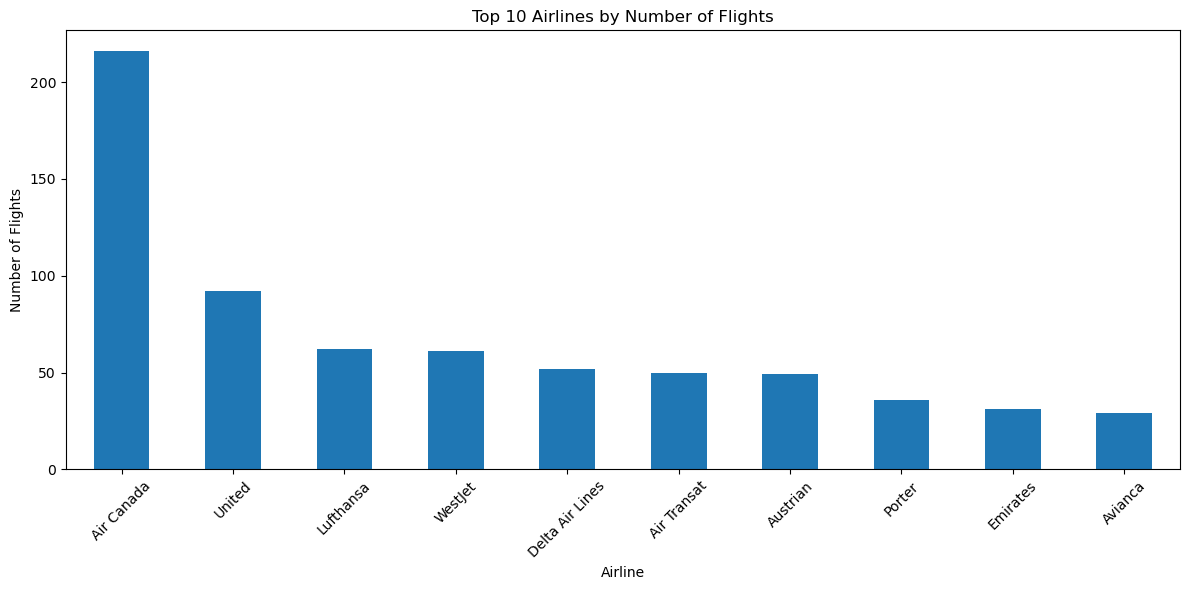

In [137]:
# --------ANALYSIS--------

print('--Airline Analysis--', '\n')
if 'airline_name' in df_clean.columns:
        # Top airlines by number of flights
        airline_counts = df_clean['airline_name'].value_counts().head(10)
        print("Top 10 Airlines by Number of Flights:")
        print(airline_counts)
        
# Airline performances
if 'departure_delay_minutes' in df_clean.columns:
    airline_performance = df_clean.groupby('airline_name').agg({
    'departure_delay_minutes': ['mean', 'median', 'std', 'count']
    }).round(2)
            
    airline_performance.columns = ['Avg_Delay', 'Median_Delay', 'Std_Delay', 'Flight_Count']
    airline_performance = airline_performance.sort_values('Avg_Delay', ascending=False)
            
    print("\nAirline Delay Performance (Top 10 by flight count):")
    top_airlines = airline_counts.head(10).index
    print(airline_performance.loc[top_airlines])
        

plt.figure(figsize=(12, 6))
airline_counts.plot(kind='bar')
plt.title('Top 10 Airlines by Number of Flights')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

-- Delay Analysis -- 


Departure Delay Minutes Statistics:
count    1115.000000
mean        3.654709
std        30.981173
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       480.000000
Name: departure_delay_minutes, dtype: float64
On-time performances: 97.2%


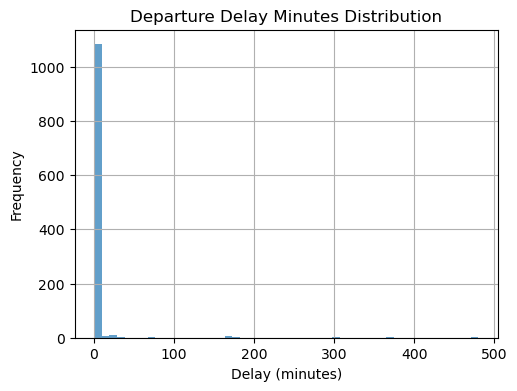


Arrival Delay Minutes Statistics:
count    583.000000
mean       4.552316
std       20.271531
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      161.000000
Name: arrival_delay_minutes, dtype: float64
On-time performances: 93.8%


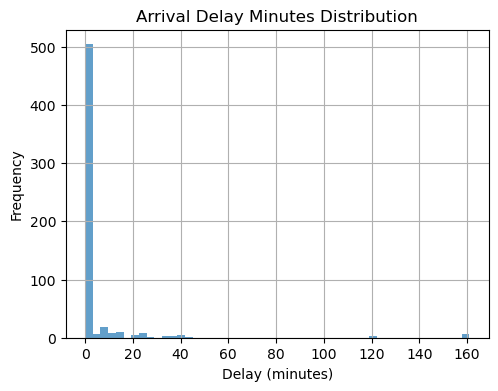

In [174]:
print('-- Delay Analysis --', '\n')

delay_columns = ['departure_delay_minutes', 'arrival_delay_minutes']
available_delays = [col for col in delay_columns if col in df_clean.columns]
    
if available_delays:
    for col in available_delays:
        print(f"\n{col.replace('_', ' ').title()} Statistics:")
        delay_stats = df_clean[col].describe()
        print(delay_stats)
            
        # Calculating on-time performance
        on_time = (df_clean[col] <= 15).sum()  # Within 15 minutes is generally considered on-time
        total = df_clean[col].notna().sum()
        on_time_percent = (on_time / total) * 100
        print(f"On-time performances: {on_time_percent:.1f}%")
            
        
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        df_clean[col].hist(bins=50, alpha=0.7)
        plt.title(f'{col.replace("_", " ").title()} Distribution')
        plt.xlabel('Delay (minutes)')
        plt.ylabel('Frequency')
            
        plt.show()

-- Airport Analysis -- 

Top 10 Destination Airports:
arrival_airport_name
Vancouver    89
Calgary      77
Winnipeg     62
Montreal     59
New York     58
Halifax      52
Chicago      50
London       44
Edmonton     42
Ottawa       41
Name: count, dtype: int64


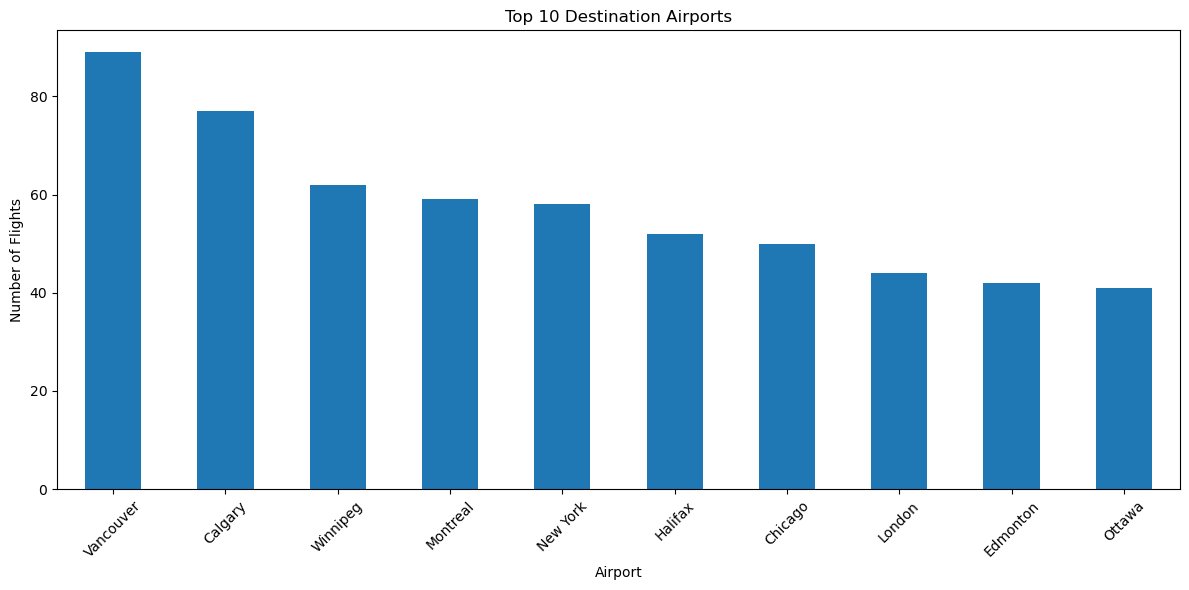

In [165]:
print("-- Airport Analysis --", '\n')
    
if 'arrival_airport_name' in df_clean.columns:
    # Top destination airports
    airport_counts = df_clean['arrival_airport_name'].value_counts().head(10)
    print("Top 10 Destination Airports:")
    print(airport_counts)
    
    plt.figure(figsize=(12, 6))
    airport_counts.plot(kind='bar')
    plt.title('Top 10 Destination Airports')
    plt.xlabel('Airport')
    plt.ylabel('Number of Flights')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

-- Aircraft Model Analysis --
Top 10 Aircraft Models:
aircraft_model
Boeing 737           164
Airbus A321          115
Airbus A220-300      105
Airbus A320           79
Airbus A319           79
Embraer 175           72
Boeing 737-800        70
Bombardier CRJ900     70
Airbus A330-300       47
Boeing 787-9          46
Name: count, dtype: int64


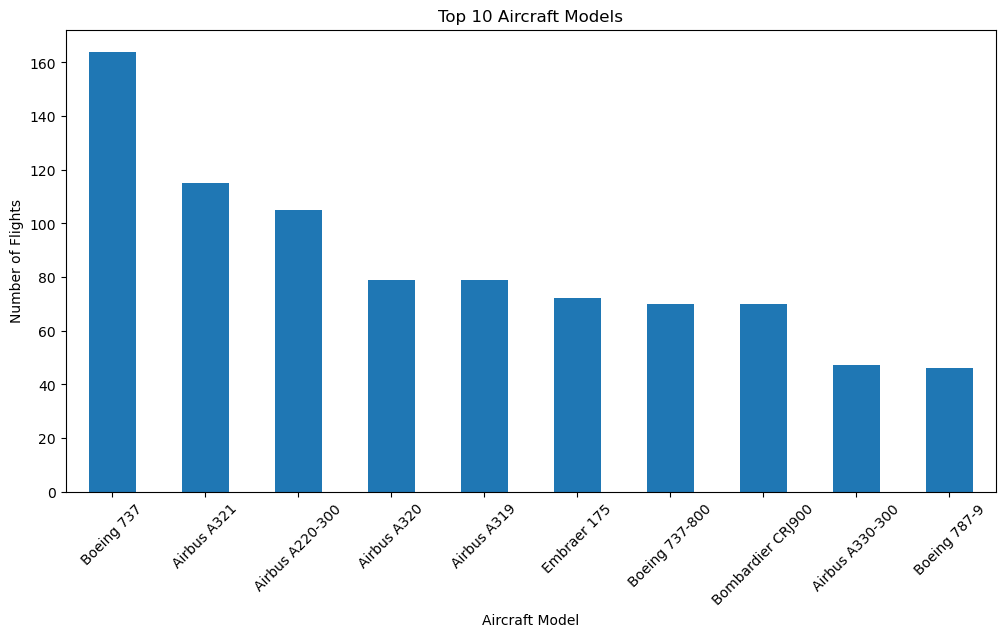

In [151]:
print('-- Aircraft Model Analysis --')

if 'aircraft_model' in df_clean.columns:
    # Top aircraft models used
    aircraft_counts = df_clean['aircraft_model'].value_counts().head(10)
    print("Top 10 Aircraft Models:")
    print(aircraft_counts)
        
    
    plt.figure(figsize=(12, 6))
    aircraft_counts.plot(kind='bar')
    plt.title('Top 10 Aircraft Models')
    plt.xlabel('Aircraft Model')
    plt.ylabel('Number of Flights')
    plt.xticks(rotation=45)
    plt.show()

-- Analysing Hourly Patterns -- 

Flights by Hour of Day:
departure_hour
0     110
1      92
2      93
11      1
12      2
13      7
14     10
15     38
16    101
17     85
18     87
19     42
20    125
21    104
22    134
23     87
Name: count, dtype: int64


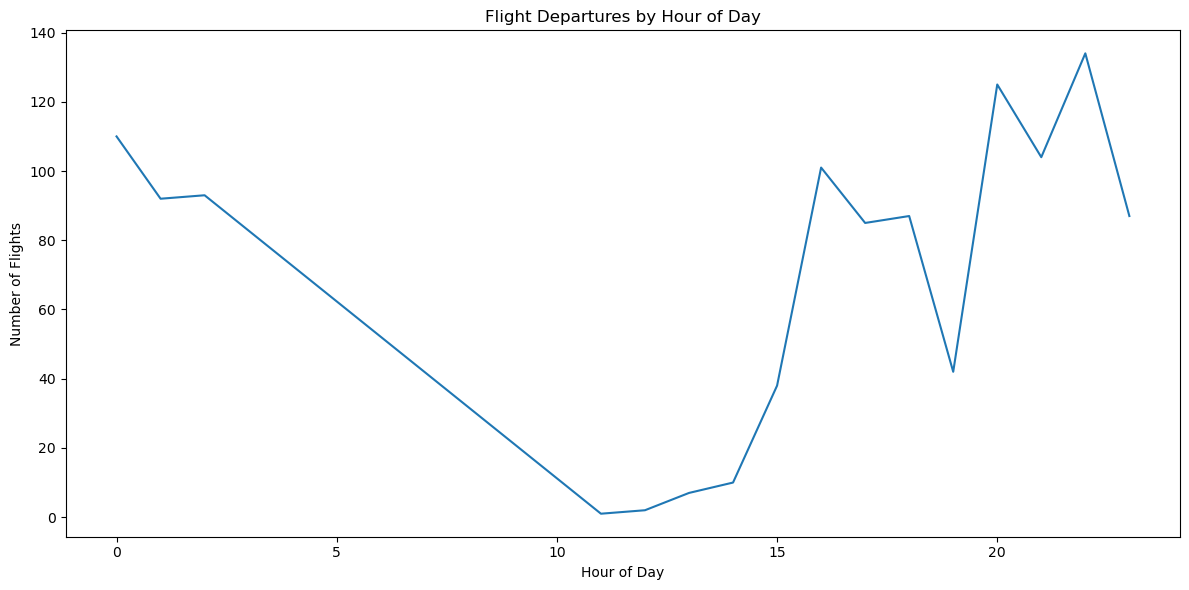

In [157]:
print('-- Analysing Hourly Patterns --', '\n')

if 'departure_hour' in df_clean.columns:
    # Departures by hour
    hourly_flights = df_clean['departure_hour'].value_counts().sort_index()
    print("Flights by Hour of Day:")
    print(hourly_flights)
    
    plt.figure(figsize=(12, 6))
    hourly_flights.plot(kind='line')
    plt.title('Flight Departures by Hour of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Flights')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

## Alternate Scenario

#### If we only wanted to look at a particular section, say the arrivals section then our code would have looked like this, similarly if we want to look at other sections we would follow the same steps.

In [ ]:
def arrivals_data(data):
    
    # First step, start by getting the departures list (this contains all flights)
    departures = data.get('departures', [])
    
    # Second, extract only the arrival data from each flight
    arrivals_list = []
    for flight in departures:
        arrival_data = flight.get('arrival', {})
        if arrival_data:  # Only adds if arrival data  to the list if it exists
            # Adding flight number for reference
            arrival_data['flight_number'] = flight.get('number', '')
            arrivals_list.append(arrival_data)
    
    # Lastly, converting the list to DataFrame using json_normalize
    if arrivals_list:
        df = pd.json_normalize(arrivals_list)
        # Cleaning up column names
        df.columns = df.columns.str.replace('.', '_')
        return df
    else:
        return pd.DataFrame()

arrivals_data(new_response)